## **CAPSTONE 1**

Por: Jorge Elias Sandon Calderin

# Dataset Description

The dataset used in this project consists of **chest X-ray images** and is organized into three main folders:

1. **Train (Training):** Contains images used for training the model.
2. **Val (Validation):** Contains images set aside to evaluate the model's performance during the training process.
3. **Test (Testing):** Contains independent images used to evaluate the final accuracy of the trained model.

## Diagnostic Classes

The dataset classifies the images into **four main categories**:
- **NORMAL:** Chest X-rays that show no abnormalities.
- **PNEUMONIA:** Chest X-rays of patients with pneumonia.
- **COVID-19:** Chest X-rays of patients infected with COVID-19.
- **TUBERCULOSIS:** Chest X-rays of patients with pulmonary tuberculosis.

Each of these categories has a specific folder within the `train`, `val`, and `test` directories.

---

## Dataset Statistics

- **Total number of images:** 7135.
- **Distribution by categories:**
  - Normal: Proportion of the total images corresponding to healthy patients.
  - Pneumonia: Proportion of the total images of patients diagnosed with pneumonia.
  - COVID-19: Proportion of the total images related to patients infected by COVID-19.
  - Tuberculosis: Proportion of the total images of patients with tuberculosis.

> Note: Exact figures can be obtained through automated exploratory analysis in Python.

---

## Dataset Sources

This dataset was created by combining several publicly recognized sources in the field of radiology and machine learning:

1. **Paul Timothy Mooney:** Chest X-ray dataset for pneumonia diagnosis.
   - Source: [Chest X-Ray Pneumonia Dataset](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
   
2. **Tawsifur Rahman:** Dataset specific to tuberculosis.
   - Source: [Tuberculosis TB Chest X-Ray Dataset](https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset)

3. **Prashant:** Chest X-ray dataset with images of COVID-19 and pneumonia.
   - Source: [Chest X-Ray COVID-19 Pneumonia Dataset](https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia)

4. **IEEE8023:** COVID-19 related images collected from multiple hospitals.
   - Source: [COVID Chest X-Ray Dataset](https://github.com/ieee8023/covid-chestxray-dataset)

---

## Dataset Purpose

The main purpose of this dataset is to serve as a foundation for **applying Artificial Intelligence (AI) techniques** in diagnosing and classifying lung diseases using chest X-ray images. Specific objectives include:

- Training deep learning models for medical image classification.
- Comparing different convolutional neural network (CNN) architectures for medical classification tasks.
- Evaluating model accuracy in detecting diseases such as COVID-19, pneumonia, and tuberculosis.
- Application in AI-assisted medical diagnostic tools.

---

## Dataset Limitations

- **Class Imbalance:** Some categories may have more images than others, which could influence model training.
- **Image Quality:** The images come from various sources, which may involve differences in resolution, brightness, and contrast.
- **Dataset Distribution:** Although the dataset is divided into training, validation, and test folders, it is important to conduct an analysis to ensure that no data leakage exists between sets.

---

## Clinical Relevance

The use of chest X-rays for detecting respiratory diseases is crucial, especially in the context of pandemics like COVID-19. This dataset is a valuable resource for developing computer-aided diagnostic systems that can support healthcare professionals in:

- Faster and more accurate diagnoses.
- Reduction of human errors.
- Early identification of critical diseases.

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from PIL import Image
from collections import Counter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import DirectoryIterator

### **Obtaining the data**

In [ ]:
#!/bin/bash
!kaggle datasets download jtiptj/chest-xray-pneumoniacovid19tuberculosis

Dataset URL: https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis
License(s): other
 99% 1.73G/1.74G [00:20<00:00, 145MB/s]
100% 1.74G/1.74G [00:20<00:00, 90.0MB/s]


In [ ]:
!unzip chest-xray-pneumoniacovid19tuberculosis.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0845-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0846-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0847-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0848-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0849-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0851-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0852-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0853-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0854-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0855-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0856-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0857-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0858-0001.jpeg  
  inflating: train/NORMAL/NORMAL2-IM-0859-0001.jpeg  
  inflating

In [ ]:
def count_images(data_dir):
    class_counts = {}
    for subset in ['train', 'val', 'test']:
        subset_dir = os.path.join(data_dir, subset)
        subset_counts = {}
        for class_name in os.listdir(subset_dir):
            class_path = os.path.join(subset_dir, class_name)
            if os.path.isdir(class_path):
                subset_counts[class_name] = len(os.listdir(class_path))
        class_counts[subset] = subset_counts
    return class_counts

data_dir = "/content"
image_counts = count_images(data_dir)

for subset, counts in image_counts.items():
    print(f"\n{subset.upper()} SET:")
    for class_name, count in counts.items():
        print(f"  {class_name}: {count} images")



TRAIN SET:
  NORMAL: 1341 images
  PNEUMONIA: 3875 images
  COVID19: 460 images
  TURBERCULOSIS: 650 images

VAL SET:
  NORMAL: 8 images
  PNEUMONIA: 8 images
  COVID19: 10 images
  TURBERCULOSIS: 12 images

TEST SET:
  NORMAL: 234 images
  PNEUMONIA: 390 images
  COVID19: 106 images
  TURBERCULOSIS: 41 images


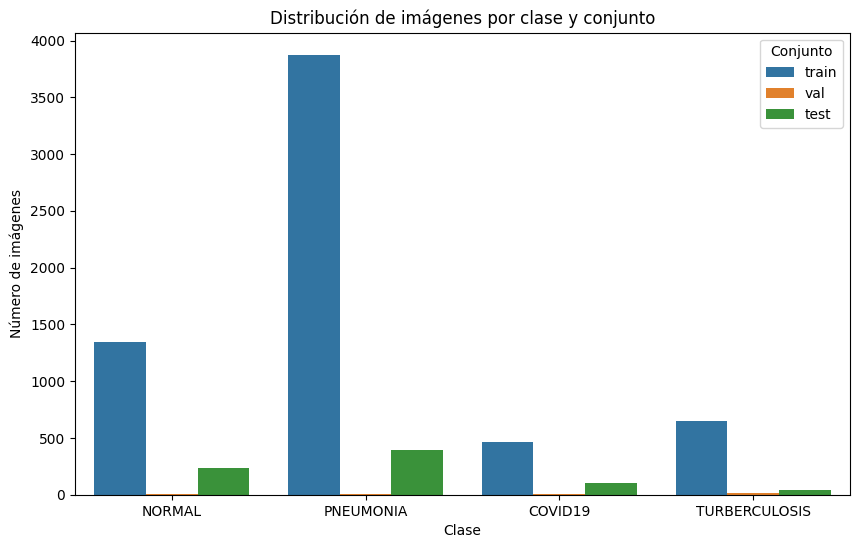

In [ ]:
# Consolidar los datos para visualización
all_counts = []
for subset, counts in image_counts.items():
    for class_name, count in counts.items():
        all_counts.append({'Set': subset, 'Class': class_name, 'Count': count})

# Crear un DataFrame para usar Seaborn
df_counts = pd.DataFrame(all_counts)

# Graficar la distribución de clases
plt.figure(figsize=(10, 6))
sns.barplot(data=df_counts, x='Class', y='Count', hue='Set')
plt.title("Distribución de imágenes por clase y conjunto")
plt.xlabel("Clase")
plt.ylabel("Número de imágenes")
plt.legend(title="Conjunto")
plt.show()



Muestra de imágenes del conjunto TRAIN:



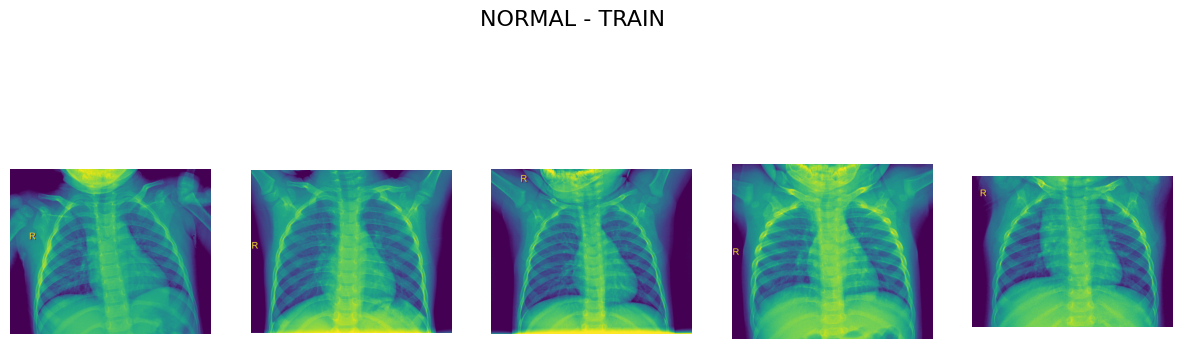

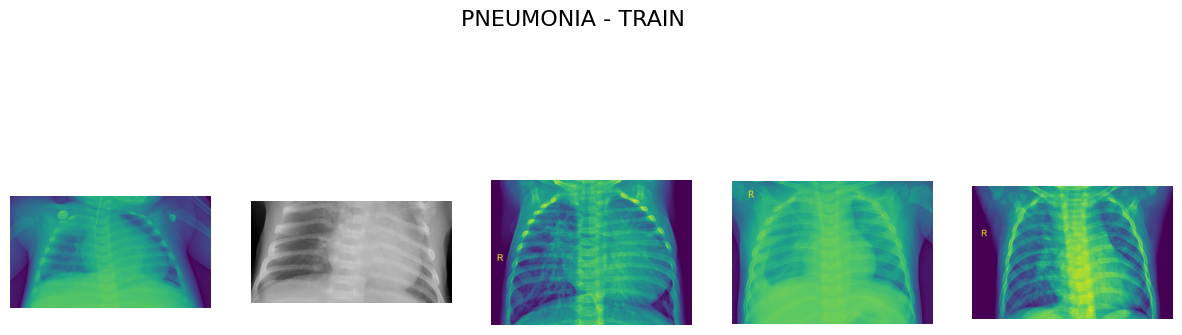

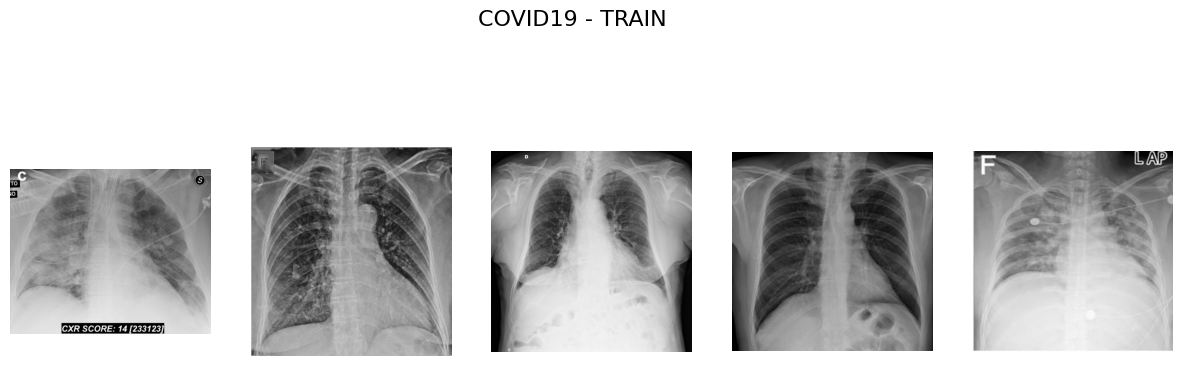

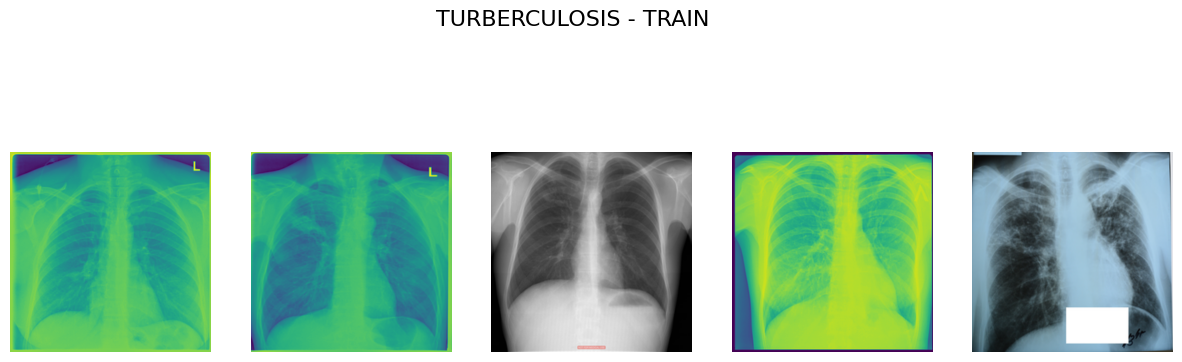


Muestra de imágenes del conjunto VAL:



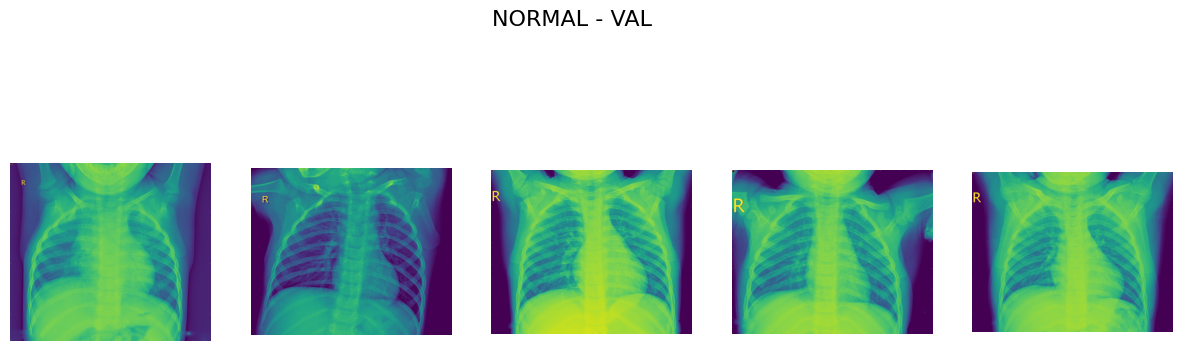

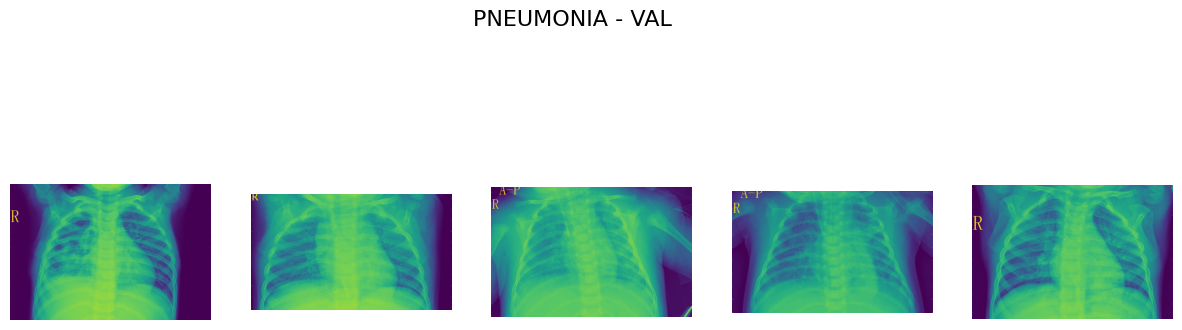

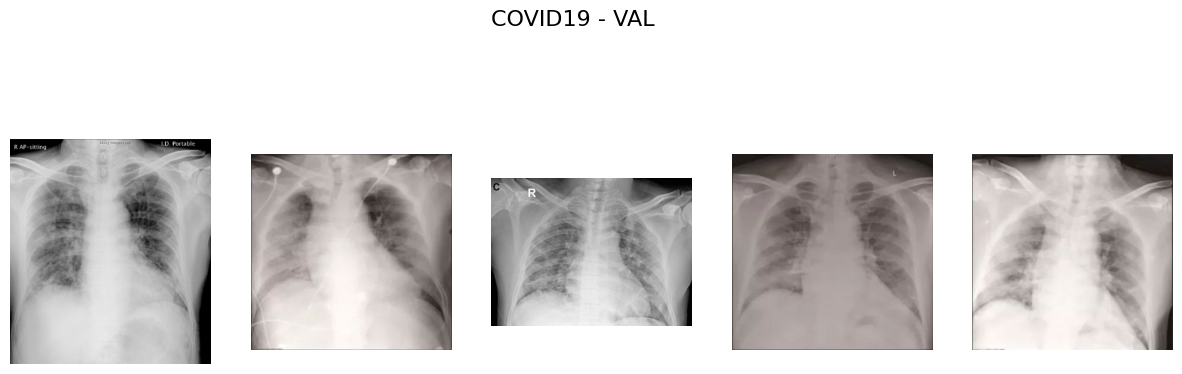

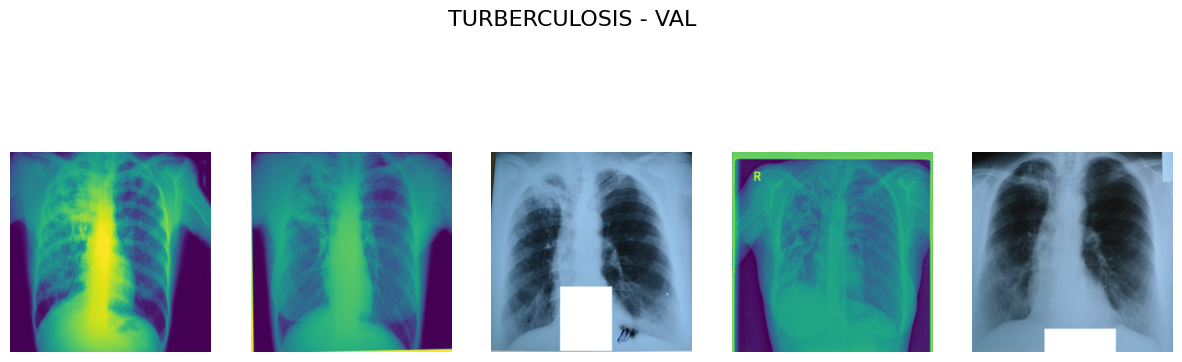


Muestra de imágenes del conjunto TEST:



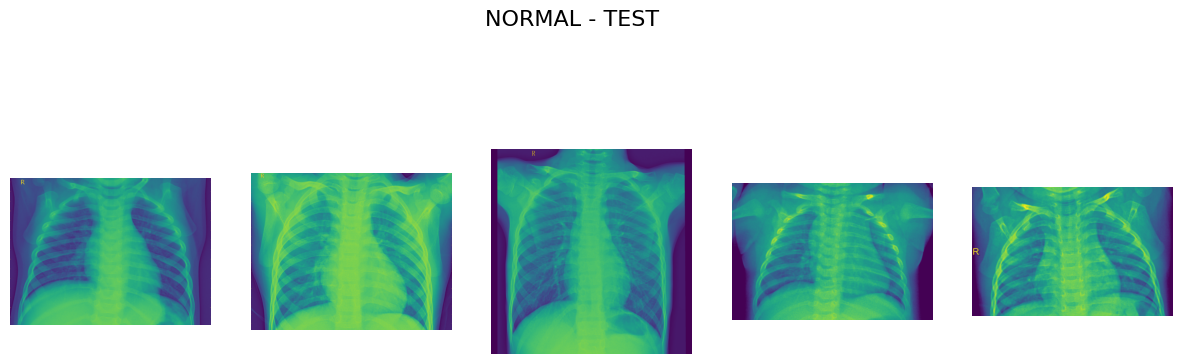

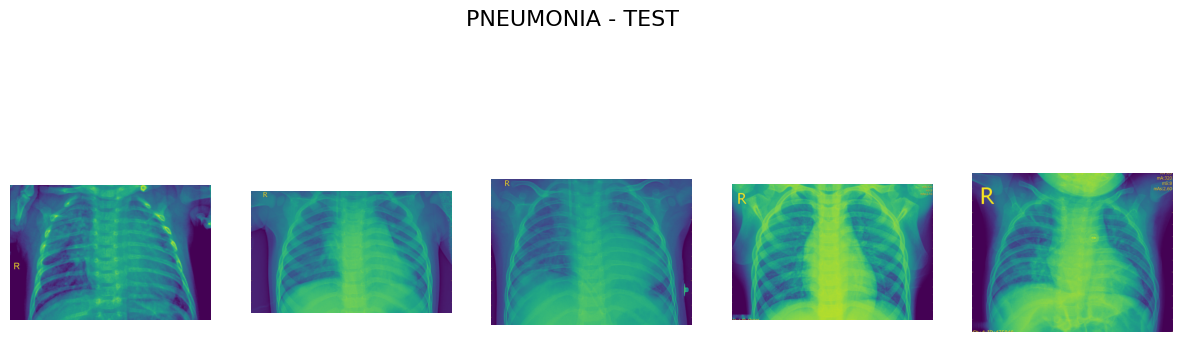

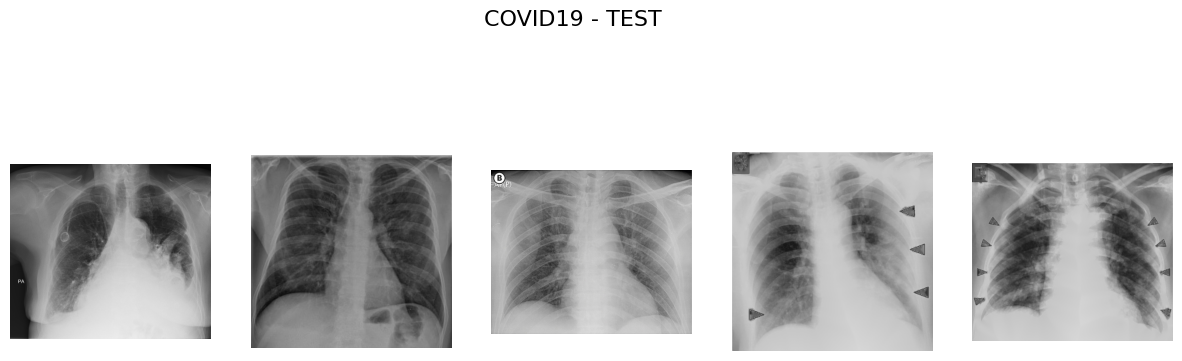

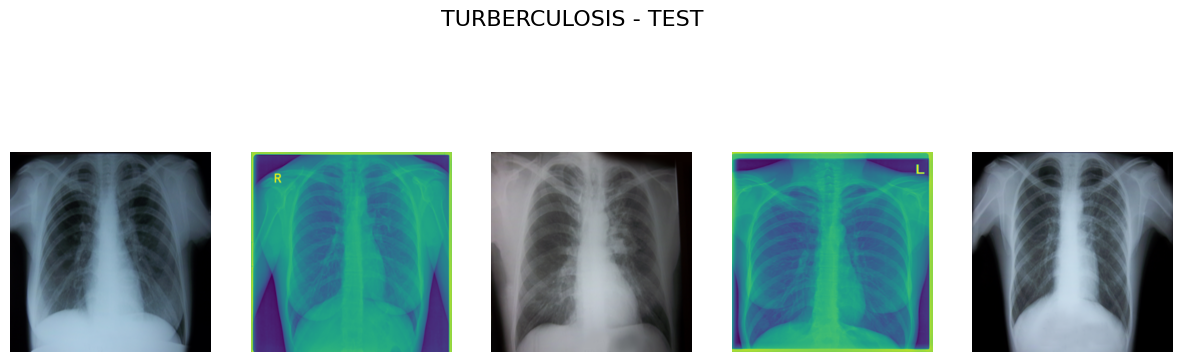

In [ ]:
def plot_sample_images(data_dir, num_images=5):
    for subset in ['train', 'val', 'test']:
        subset_dir = os.path.join(data_dir, subset)
        print(f"\nMuestra de imágenes del conjunto {subset.upper()}:\n")

        for class_name in os.listdir(subset_dir):
            class_path = os.path.join(subset_dir, class_name)
            if os.path.isdir(class_path):
                images = os.listdir(class_path)[:num_images]
                fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
                fig.suptitle(f"{class_name} - {subset.upper()}", fontsize=16)

                for i, img_name in enumerate(images):
                    img_path = os.path.join(class_path, img_name)
                    img = Image.open(img_path)
                    axes[i].imshow(img)
                    axes[i].axis('off')
                plt.show()

plot_sample_images(data_dir)


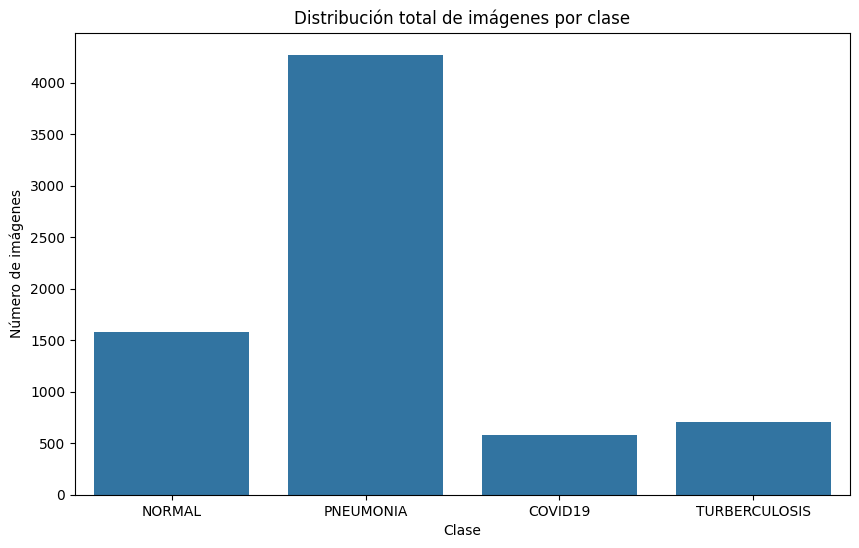

In [ ]:
# Balance de clases
total_counts = Counter()
for subset, counts in image_counts.items():
    for class_name, count in counts.items():
        total_counts[class_name] += count

plt.figure(figsize=(10, 6))
sns.barplot(x=list(total_counts.keys()), y=list(total_counts.values()))
plt.title("Distribución total de imágenes por clase")
plt.xlabel("Clase")
plt.ylabel("Número de imágenes")
plt.show()


### **Data generator configuration**

In [ ]:
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar las imágenes desde las carpetas
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 6326 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


### **Create the convolutional neural network**

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,781,380 (10.61 MB)

 Trainable params: 2,781,380 (10.61 MB)

 Non-trainable params: 0 (0.00 B)

### **Training the model**

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=7,  # Ajustar
    verbose=1
)

Epoch 1/7
198/198 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.6124 - loss: 1.0586 - val_accuracy: 0.5526 - val_loss: 1.1738
Epoch 2/7
198/198 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7985 - loss: 0.4912 - val_accuracy: 0.7632 - val_loss: 0.8292
Epoch 3/7
198/198 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8722 - loss: 0.3393 - val_accuracy: 0.6579 - val_loss: 1.0900
Epoch 4/7
198/198 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9086 - loss: 0.2707 - val_accuracy: 0.6842 - val_loss: 0.8397
Epoch 5/7
198/198 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9178 - loss: 0.2336 - val_accuracy: 0.7105 - val_loss: 0.8137
Epoch 6/7
198/198 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9286 - loss: 0.2121 - val_accuracy: 0.6579 - val_loss: 0.8822
Epoch 7/7
198/198 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.9352 - loss: 0.1843 - val_accuracy: 0.7632 - val_loss: 0.7098


### **Evaluate the model**

**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 886ms/step - accuracy: 0.8169 - loss: 0.6482
Test Accuracy: 0.81


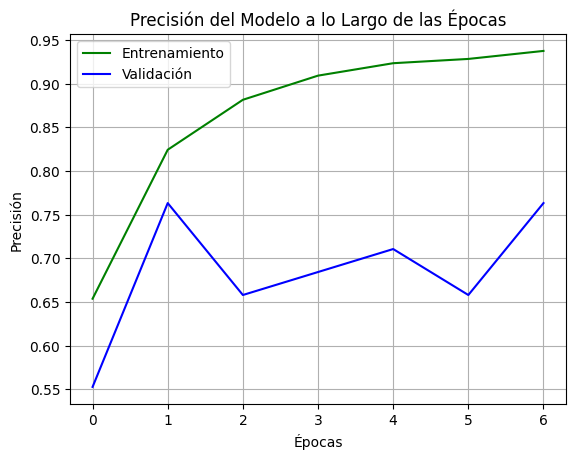

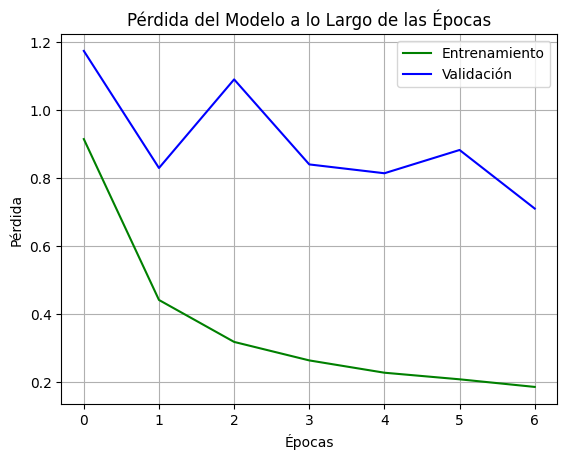

<Figure size 640x480 with 0 Axes>

In [ ]:
# Obtener los datos del historial de entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Gráfica de precisión (accuracy)
plt.plot(epochs, acc, 'g', label='Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Validación')
plt.title('Precisión del Modelo a lo Largo de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.figure()

# Gráfica de pérdida (loss)
plt.plot(epochs, loss, 'g', label='Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Validación')
plt.title('Pérdida del Modelo a lo Largo de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.figure()

# Mostrar todas las gráficas
plt.show()

In [ ]:
# Guardar el modelo completo
model.save('modelo_clasificacion.h5')